### Visualizing the CARMA parameter space occupied by AGN and variable stars

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in CARMA features

In [2]:
# nan for fitting faliures, so dropna to get clean data
qso_df = pd.read_csv('../Data/DHO_QSO_fts2.csv').dropna()
vStar_df = pd.read_csv('../Data/DHO_vStar_fts2.csv').dropna()

In [3]:
qso_df.head(2)

,train_id,dho_a1,dho_a2,dho_b0,dho_b1,dho_amp,dho_complex,tau_decay,tau_qpo_rise,tau_decorr,tau_ma
0,0,5.000475,0.360408,0.150001,0.040081,0.080019,0,13.671535,0.202950,21.793989,0.267206
1,3,11.437776,0.304133,0.379154,0.218156,0.150810,0,37.520176,0.087634,59.074209,0.575377


In [4]:
vStar_df.head(2)

,train_id,dho_a1,dho_a2,dho_b0,dho_b1,dho_amp,dho_complex,tau_decay,tau_qpo_rise,tau_decorr,tau_ma
0,100012,2.458314,0.86860,0.102943,0.001638,0.049820,0,2.337726,0.492478,4.445673,0.015916
1,100016,2.565210,0.69817,0.118019,0.002043,0.062365,0,3.230867,0.443322,5.771403,0.017307


##### Notes for column names:
- `train_id`: ID for source in the training data.
- `dho_a1`: DHO parameter a1.
- `dho_a2`: DHO parameter a2.
- `dho_b0`: DHO parameter b0.
- `dho_b1`: DHO parameter b1.
- `dho_amp`: Asymptotic standard deviation of the DHO process.
- `dho_complex`: Whether having complex roots (1 for yes)
- `tau_decay`: Decay timescale.
- `tau_qpo_rise`: Damped QPO timescale if having complex AR roots or rising timescale in the overdamped DHO case.
- `tau_decorr`: Decorrelation timescale, see Moreno+ 2019 for reference.
- `tau_ma`: MA timescale or tau_blue. 

In [5]:
# seperat real and complex cases
qso_complex = qso_df[qso_df.dho_complex == 1].copy()
qso_real = qso_df[qso_df.dho_complex == 0].copy()

vStar_complex = vStar_df[vStar_df.dho_complex == 1].copy()
vStar_real = vStar_df[vStar_df.dho_complex == 0].copy()

In [18]:
print(f'Number of AGN having complex roots: {qso_complex.shape[0]}')
print(f'Number of AGN having real roots: {qso_real.shape[0]}')
print(f'Number of stars having complex roots: {vStar_complex.shape[0]}')
print(f'Number of stars having real roots: {vStar_real.shape[0]}')

Number of AGN having complex roots: 1627
Number of AGN having real roots: 22929
Number of stars having complex roots: 10862
Number of stars having real roots: 13049


#### Make plots to see AGN/Star seperation in the DHO space

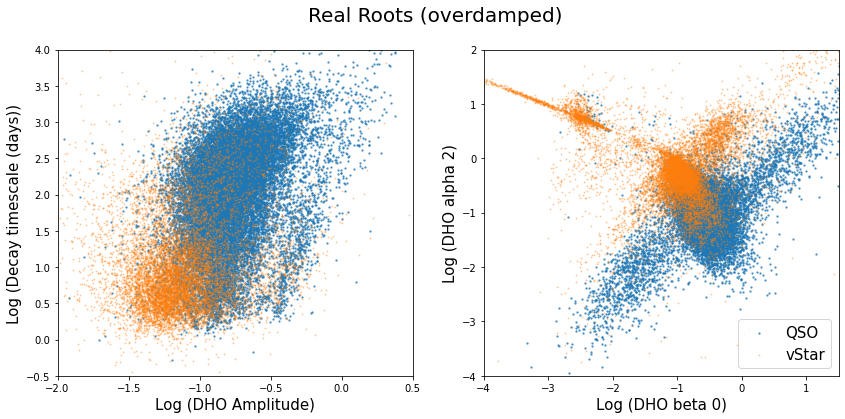

In [15]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(np.log10(qso_real.dho_amp), np.log10(qso_real.tau_decay), s=2, alpha=0.6, label='QSO')
axes[0].scatter(np.log10(vStar_real.dho_amp), np.log10(vStar_real.tau_decay), s=1, alpha=0.3, label='vStar')
axes[1].scatter(np.log10(qso_real.dho_b0), np.log10(qso_real.dho_a2), s=2, alpha=0.6, label='QSO')
axes[1].scatter(np.log10(vStar_real.dho_b0), np.log10(vStar_real.dho_a2), s=1, alpha=0.3, label='vStar')
axes[0].set_ylim(-.5, 4)
axes[0].set_xlim(- 2, 0.5)
axes[1].set_xlim(-4, 1.5)
axes[1].set_ylim(-4, 2)
axes[0].set_xlabel('Log (DHO Amplitude)', fontsize = 15)
axes[0].set_ylabel('Log (Decay timescale (days))', fontsize = 15)
axes[1].set_xlabel('Log (DHO beta 0)', fontsize = 15)
axes[1].set_ylabel('Log (DHO alpha 2)', fontsize = 15)

fig.suptitle('Real Roots (overdamped)', fontsize=20)
plt.legend(loc='best', prop={'size': 15})

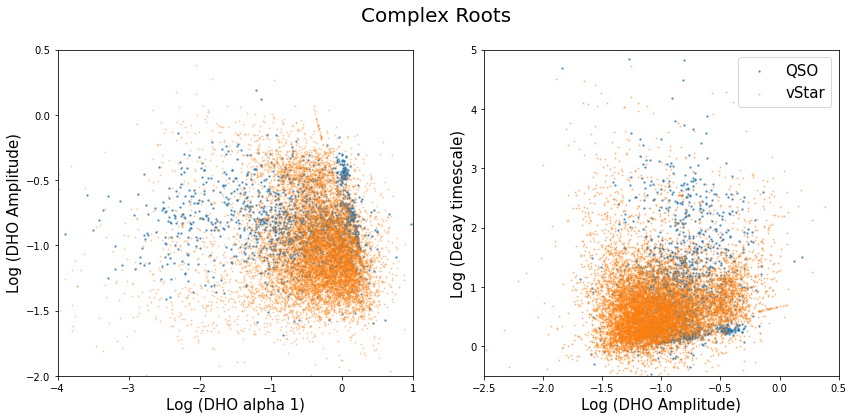

In [16]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(np.log10(qso_complex.dho_a1), np.log10(qso_complex.dho_amp), s=2, alpha=0.6, label='QSO')
axes[0].scatter(np.log10(vStar_complex.dho_a1), np.log10(vStar_complex.dho_amp), s=1, alpha=0.3, label='vStar')
axes[1].scatter(np.log10(qso_complex.dho_amp), np.log10(qso_complex.tau_decay), s=2, alpha=0.6, label='QSO')
axes[1].scatter(np.log10(vStar_complex.dho_amp), np.log10(vStar_complex.tau_decay), s=1, alpha=0.4, label='vStar')
axes[0].set_ylim(-2, 0.5)
axes[0].set_xlim(-4, 1)
axes[1].set_ylim(-.5, 5)
axes[1].set_xlim(-2.5, .5)
axes[0].set_xlabel('Log (DHO alpha 1)', fontsize = 15)
axes[0].set_ylabel('Log (DHO Amplitude)', fontsize = 15)
axes[1].set_xlabel('Log (DHO Amplitude)', fontsize = 15)
axes[1].set_ylabel('Log (Decay timescale)', fontsize = 15)

fig.suptitle('Complex Roots', fontsize=20)
plt.legend(loc='best', prop={'size': 15})

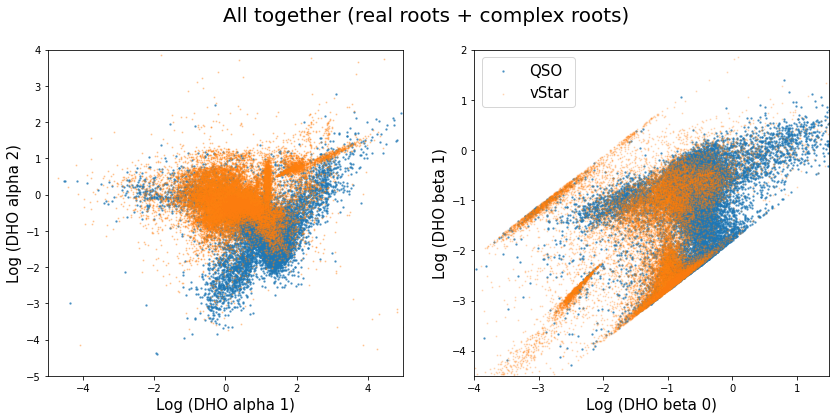

In [14]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(np.log10(qso_df.dho_a1), np.log10(qso_df.dho_a2), s=2, alpha=0.6, label='QSO')
axes[0].scatter(np.log10(vStar_df.dho_a1), np.log10(vStar_df.dho_a2), s=1, alpha=0.3, label='vStar')
axes[1].scatter(np.log10(qso_df.dho_b0), np.log10(qso_df.dho_b1), s=2, alpha=0.6, label='QSO')
axes[1].scatter(np.log10(vStar_df.dho_b0), np.log10(vStar_df.dho_b1), s=1, alpha=0.2, label='vStar')
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 4)
axes[1].set_xlim(-4, 1.5)
axes[1].set_ylim(-4.5, 2)
axes[0].set_xlabel('Log (DHO alpha 1)', fontsize = 15)
axes[0].set_ylabel('Log (DHO alpha 2)', fontsize = 15)
axes[1].set_xlabel('Log (DHO beta 0)', fontsize = 15)
axes[1].set_ylabel('Log (DHO beta 1)', fontsize = 15)

fig.suptitle('All together (real roots + complex roots)', fontsize=20)
plt.legend(loc='best', prop={'size': 15})